# HR Analytics

## Discovering the factors that influence employee turnover

## Model generation and comparison
***

# Table of Contents

### I. [Data Preprocessing](#preprocess)

### II. Model Training

1. [Logistic Regression (as baseline)](#logistic-reg)
2. [Ridge Regression (Classifier)](#ridge-reg)
3. [SVM](#svm)
4. [Random Forest](#rf)
5. [Gradient Boosting](#gb)

In [22]:
__author__ = "Vita Levytska"
__email__ = "levytska.vita@gmail.com"

## Load Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Display Data

In [24]:
def read_data(file):
    return pd.read_csv(file)

def drop_columns(df, col_list):
    data = df.drop(col_list, axis=1)
    return data

In [25]:
df = read_data("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


## Drop Columns

In [26]:
col_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = drop_columns(df, col_list)

## Check if dataset is balanced

In [27]:
attrition_rate = df["Attrition"].value_counts() / 1470
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Since our dataset is imbalanced, we will use SMOTE Sampling

<a id='preprocess'></a>
## Data Preprocessing

### Encode categorical variables

Label encoding was already done (labels are encoded in data)

Nominal variables are to be encoded

In [28]:
# split into features and target
features_df = df.drop(columns = ['Attrition'])

df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0 })
target = np.array(df['Attrition'])

# dummy encode variables
features_df = pd.get_dummies(features_df, drop_first = True)

## Train / test split

In [29]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, resp_train, resp_test = train_test_split(features_df, target, test_size=0.25)

In [30]:
len(resp_train)

1102

## Resampling using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE()
feat_train_sampled, resp_train_sampled = sm.fit_resample(feat_train, resp_train)

In [32]:
len(resp_train_sampled)

1856

## Models to be trained

1. [Logistic Regression (as baseline)](#logistic-reg)
2. [Ridge Regression (Classifier)](#ridge-reg)
3. [SVM](#svm)
4. [Random Forest](#rf)
5. [Gradient Boosting](#gb)

## Model Performance Measure

To measure and compare the performance of our models we will use **Recall** because we want to measure how many of employees that quit their job we labeled correctly. If we can identify the employees that are going to leave the company potentially, we can target them with specific programs or trainings to prevent their attrition. The costs of targeting the employees who may potentially leave (even if they are not going to) is lower than looking for a new employee and train them if we fail to identify those at risk of attrition.

<a id='logistic-reg'></a>
## 1. Logistic Regression

Logistic regression was used as a baseline because linear and logistic regression are commonly used by companies that do not have data scientists and fit these models using Excel. This analysis will demonstrate a few other models that have better performance than logistic regression. 

In [33]:
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

# fit the model
lg = LogisticRegressionCV(cv=10, random_state=42, max_iter = 10000).fit(feat_train_sampled, resp_train_sampled)

#calculate and print recall score
lg_recall = recall_score(resp_test, lg.predict(feat_test))
print("Recall score for Logistic Regression is %2.2f" % lg_recall)

Recall score for Logistic Regression is 0.49


In [34]:
from sklearn.metrics import classification_report
print(classification_report(resp_test, lg.predict(feat_test)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       305
           1       0.39      0.49      0.44        63

    accuracy                           0.78       368
   macro avg       0.64      0.67      0.65       368
weighted avg       0.80      0.78      0.79       368



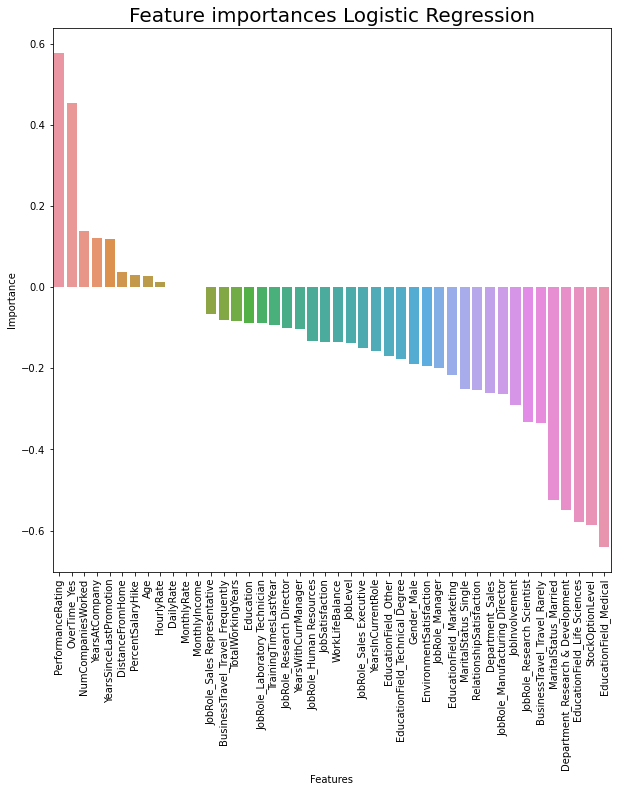

In [35]:
lg_var_importance = pd.DataFrame(data={
    'Features': feat_train_sampled.columns,
    'Importance': lg.coef_[0]
})
lg_var_importance = lg_var_importance.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=lg_var_importance['Features'], y=lg_var_importance['Importance'], ax=ax)
plt.title('Feature importances Logistic Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

<a id='ridge-reg'></a>
## 2. Ridge Regression Classifier

In [36]:
from sklearn.linear_model import RidgeClassifier

# fit the model
rc = RidgeClassifier(alpha=18, fit_intercept=True, normalize=True, copy_X=True, max_iter=None, tol=0.001, 
                     class_weight=None, solver='auto', random_state=42)
rc.fit(feat_train_sampled, resp_train_sampled)

#calculate and print recall score
rc_recall = recall_score(resp_test, rc.predict(feat_test))
print("Recall score for Ridge Regression Classifier is %2.2f" % rc_recall)

Recall score for Ridge Regression Classifier is 0.59


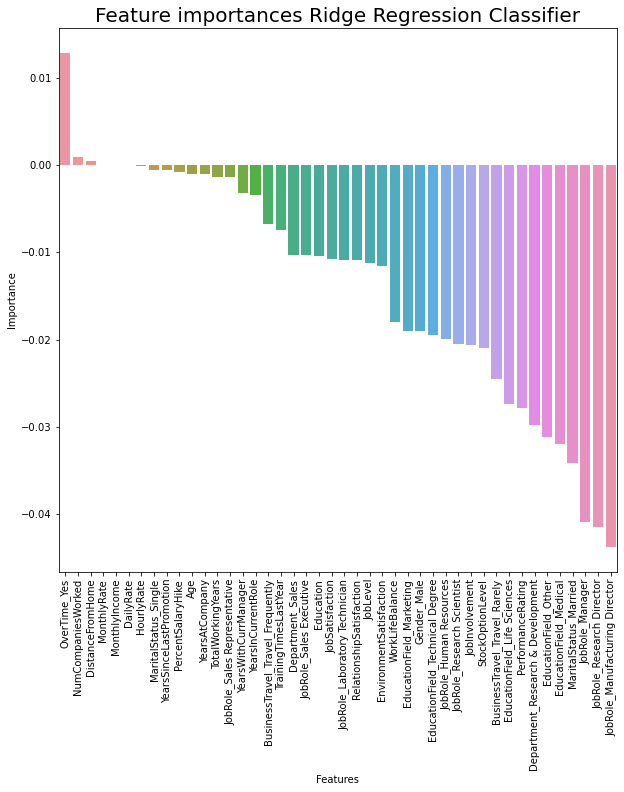

In [37]:
rc_var_importance = pd.DataFrame(data={
    'Features': feat_train_sampled.columns,
    'Importance': rc.coef_[0]
})
rc_var_importance = rc_var_importance.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=rc_var_importance['Features'], y=rc_var_importance['Importance'], ax=ax)
plt.title('Feature importances Ridge Regression Classifier', size=20)
plt.xticks(rotation='vertical')
plt.show()

<a id='svm'></a>
## 3. SVM

The following parameters were manually tuned: C, kernel and gamma. 

In [38]:
from sklearn.svm import SVC

# fit the model
svm_model = SVC(C=0.01, kernel='poly', degree=2, gamma='scale', coef0=0.0, shrinking=True, probability=False, 
                       tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, 
                       decision_function_shape='ovr', break_ties=False, random_state=42)
svm_model.fit(feat_train_sampled, resp_train_sampled)

#calculate and print recall score
svm_recall = recall_score(resp_test, svm_model.predict(feat_test))
print("Recall score for SVM is %2.2f" % svm_recall)

Recall score for SVM is 0.97


In [39]:
from sklearn.model_selection import KFold
recall_score_list = []

# perform 10-fold cross validation
kf = KFold(n_splits=10, shuffle = True, random_state =40)

for train_index, test_index in kf.split(feat_train_sampled):

    X_train, X_test = feat_train_sampled.loc[train_index], feat_train_sampled.loc[test_index]
    y_train, y_test = resp_train_sampled[train_index], resp_train_sampled[test_index]

    svm_model.fit(X_train,y_train)
    predictions = svm_model.predict(X_test)
    svm_recall = recall_score(y_test, svm_model.predict(X_test))
    recall_score_list.append(svm_recall)


# print(recall_score_list)   
print("Mean recall score after 10-fold cross validation is %2.2f" % np.mean(recall_score_list))

Mean recall score after 10-fold cross validation is 0.95


<a id='rf'></a>
## 4. Random Forest

First, we do hyperparameter tuning by hand to determine which hyperparameters yield better results, then use random search to select best model. 

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 1, max_features = None, min_samples_leaf = 2 ,n_estimators = 1000, oob_score = True, random_state = 42)
rf = rf.fit(feat_train_sampled, resp_train_sampled)
rf_recall = recall_score(resp_test, rf.predict(feat_test))
print("Recall score for Random Forest is %2.2f" % rf_recall)

Recall score for Random Forest is 0.63


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid_rf = {'n_estimators': [100, 250, 500, 750, 1000, 1250],
               'max_features': [None, 0.9],
               'max_depth': [1,2,3,4,5],
               'min_samples_leaf': [1,2,3]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, scoring = 'recall', n_iter = 100, cv = 3, verbose = 4,
                               random_state=42)
rf_random.fit(feat_train_sampled, resp_train_sampled)

#select best model
rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=250; total time=   0.3s
[CV 2/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=250; total time=   0.3s
[CV 3/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=250; total time=   0.3s
[CV 1/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV 2/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV 3/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=100; total time=   0.1s
[CV 1/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=750; total time=   2.9s
[CV 2/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=750; total time=   2.8s
[CV 3/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=750; total time=   2.7s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=2, max_features=0.9, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV 1/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 2/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 3/3] END max_depth=1, max_features=0.9, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 1/3] END max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=1000; total time=   4.7s
[CV 2/3] END max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=1000; total time=   4.3s
[CV 3/3] END max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=1000; total time=   4.3s
[CV 1/3] END max_depth=5, max_features=0.9, min_samples_leaf=2, n_estimators=1250; total time=   4.8s
[CV 2/3] END max_depth=5, max_features=0.9, min_samples_leaf=2, n_estimators=1250; total time=   5.3s
[CV 3/3] END max_depth=5, max_features=0.9, min_samples_leaf=2, n_estimators=1250; 

[CV 3/3] END max_depth=5, max_features=0.9, min_samples_leaf=3, n_estimators=500; total time=   1.9s
[CV 1/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=1000; total time=   2.5s
[CV 2/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=1000; total time=   2.4s
[CV 3/3] END max_depth=2, max_features=None, min_samples_leaf=2, n_estimators=1000; total time=   2.5s
[CV 1/3] END max_depth=3, max_features=None, min_samples_leaf=3, n_estimators=250; total time=   0.7s
[CV 2/3] END max_depth=3, max_features=None, min_samples_leaf=3, n_estimators=250; total time=   0.7s
[CV 3/3] END max_depth=3, max_features=None, min_samples_leaf=3, n_estimators=250; total time=   0.7s
[CV 1/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=500; total time=   2.1s
[CV 2/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=500; total time=   2.1s
[CV 3/3] END max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50

[CV 3/3] END max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100; total time=   0.3s
[CV 1/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=250; total time=   0.8s
[CV 2/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=250; total time=   0.7s
[CV 3/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=250; total time=   0.7s
[CV 1/3] END max_depth=1, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 2/3] END max_depth=1, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 3/3] END max_depth=1, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV 1/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=1000; total time=   3.1s
[CV 2/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=1000; total time=   3.0s
[CV 3/3] END max_depth=4, max_features=0.9, min_samples_leaf=2, n_estimators=1000; to

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=1000,
                       oob_score=True, random_state=42)

In [43]:
best_rf = RandomForestClassifier(max_depth=5, max_features=0.9, n_estimators=500,
                       oob_score=True, random_state=42)
best_rf = best_rf.fit(feat_train_sampled, resp_train_sampled)
best_rf_recall = recall_score(resp_test, best_rf.predict(feat_test))
print("Recall score for Random Forest is %2.2f" % rf_recall)

Recall score for Random Forest is 0.63


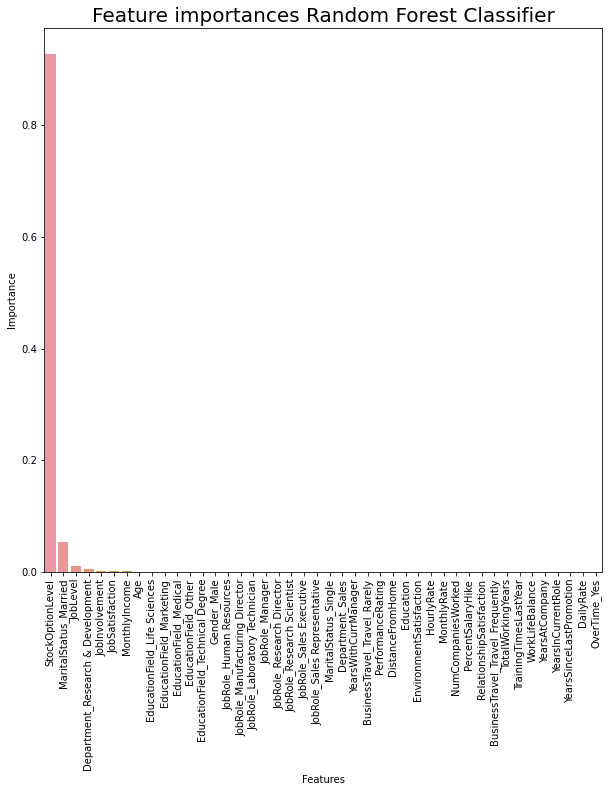

In [44]:
rf_var_importance = pd.DataFrame(data={
    'Features': feat_train_sampled.columns,
    'Importance': rf.feature_importances_
})
rf_var_importance = rf_var_importance.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=rf_var_importance['Features'], y=rf_var_importance['Importance'], ax=ax)
plt.title('Feature importances Random Forest Classifier', size=20)
plt.xticks(rotation='vertical')
plt.show()

<a id='gb'></a>
## 5. Gradient Boosting

In [45]:
import xgboost as xgb

#fit the model
gb_model = xgb.XGBClassifier(colsample_bytree=0.3, gamma=0.001, learning_rate=0.1, max_depth=3, min_child_weight=1,
                  n_estimators=2000, subsample=0.3, use_label_encoder=False, random_state = 0)
gb_model.fit(feat_train_sampled, resp_train_sampled)

#calculate and print recall score
gb_recall = recall_score(resp_test, gb_model.predict(feat_test))
print("Recall score for Gradient Boosting is %2.2f" % gb_recall)

[00:28:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall score for Gradient Boosting is 0.48


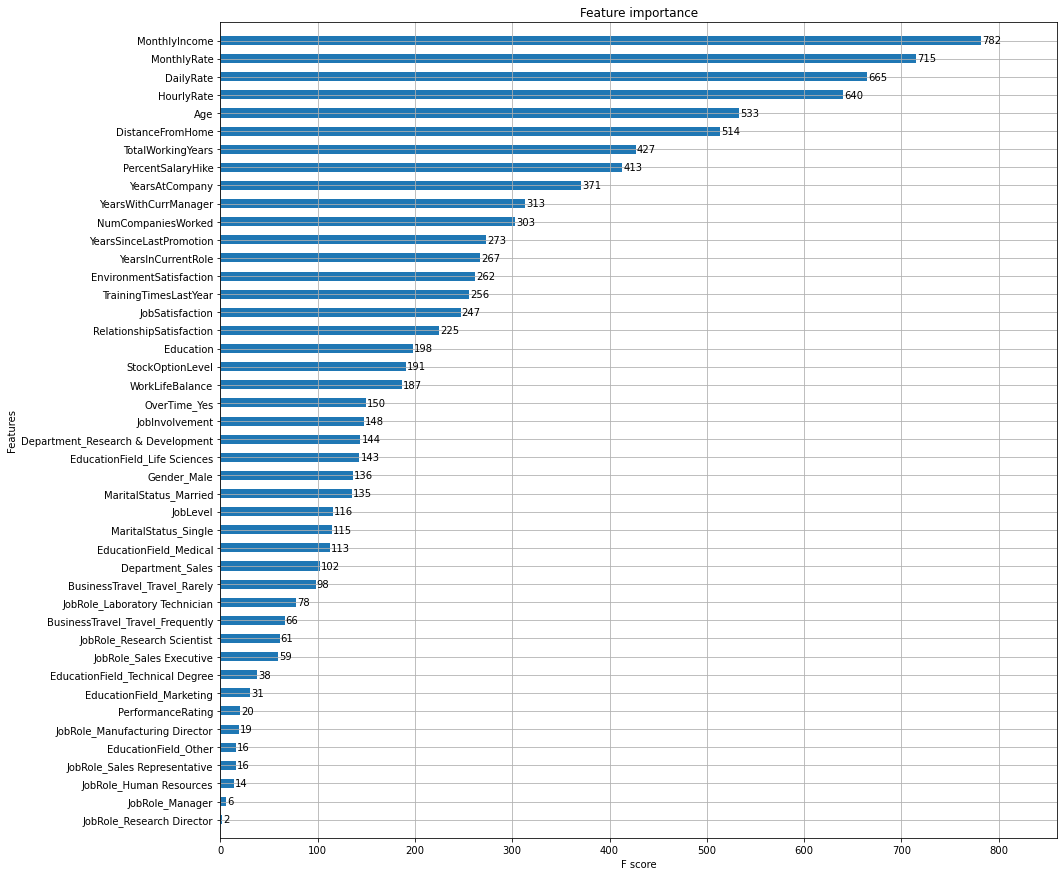

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(gb_model, height = 0.5, ax = ax)
plt.show()

## Precision-Recall Curve

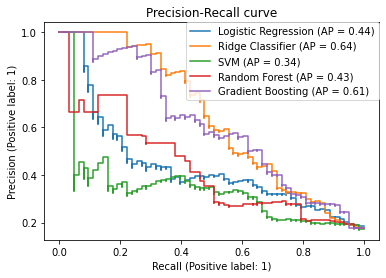

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(lg, feat_test, resp_test, ax = plt.gca(),name = "Logistic Regression")

plot_precision_recall_curve(rc, feat_test, resp_test, ax = plt.gca(),name = "Ridge Classifier")

plot_precision_recall_curve(svm_model, feat_test, resp_test, ax = plt.gca(),name = "SVM")

plot_precision_recall_curve(rf, feat_test, resp_test, ax = plt.gca(),name = "Random Forest")

plot_precision_recall_curve(gb_model, feat_test, resp_test, ax = plt.gca(),name = "Gradient Boosting")

plt.title('Precision-Recall curve')

plt.legend(borderaxespad=0.)
plt.savefig('pr_curve.jpeg', format='jpeg', dpi=1100, bbox_inches='tight')